## Key Requirements for the iRF scikit-learn implementation

* The following is a documentation of the main requirements for the iRF implementation

## Typical Setup

In [1]:
# Setup
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

# Define a function to draw the decision trees in IPython
# Adapted from: http://scikit-learn.org/stable/modules/tree.html
from IPython.display import display, Image
import pydotplus

# Custom util functions
from utils import utils

RANDOM_STATE_SPLIT         = 1001
RANDOM_STATE_CLASSIFIER    = 1039

/Users/shamindras/anaconda/envs/sklearnprod0/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Step 1: Fit the Initial Random Forest

* Just fit every feature with equal weights per the usual random forest code e.g. DecisionForestClassifier in scikit-learn

In [2]:
# Load the iris data
iris = load_iris()

# Create the train-test datasets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = RANDOM_STATE_SPLIT)

# Just fit a simple random forest classifier with 2 decision trees
rf = RandomForestClassifier(n_estimators = 2, random_state = RANDOM_STATE_CLASSIFIER)
rf.fit(X = X_train, y = y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=False, random_state=1039,
            verbose=0, warm_start=False)

## Step 2: For each Tree get core leaf node features

* For each decision tree in the classifier, get:
    * The list of leaf nodes
    * Depth of the leaf node    
    * Leaf node predicted class i.e. {0, 1}
    * Probability of predicting class in leaf node
    * Number of observations in the leaf node i.e. weight of node

### Get the 2 Decision trees to use for testing

In [78]:
estimator0 = rf.estimators_[0] # First tree
estimator1 = rf.estimators_[1] # Second tree

## Design the single function to get the key tree information

In [79]:
from imp import reload
from utils import utils
reload(utils)

<module 'utils.utils' from '/Users/shamindras/PERSONAL/LEARNING/REPOS/scikit-learn-sandbox/jupyter/utils/utils.py'>

## Get data from the first and second decision tree

In [80]:
tree_dat0 = utils.getTreeData(X_train = X_train, dtree = estimator0, root_node_id = 0)
tree_dat1 = utils.getTreeData(X_train = X_train, dtree = estimator1, root_node_id = 0)

## Decision Tree 0 (First) - Get output

In [81]:
utils.prettyPrintDict(inp_dict = tree_dat0)

{   'all_leaf_node_classes': [0, 1, 1, 2, 1, 2, 2, 1, 2],
    'all_leaf_node_paths': [   array([0, 1]),
                               array([0, 2, 3, 4]),
                               array([0, 2, 3, 5, 6, 7]),
                               array([0, 2, 3, 5, 6, 8]),
                               array([ 0,  2,  3,  5,  9, 10]),
                               array([ 0,  2,  3,  5,  9, 11]),
                               array([ 0,  2, 12, 13, 14]),
                               array([ 0,  2, 12, 13, 15]),
                               array([ 0,  2, 12, 16])],
    'all_leaf_node_values': [   array([[41,  0,  0]]),
                                array([[ 0, 17,  0]]),
                                array([[0, 1, 0]]),
                                array([[0, 0, 4]]),
                                array([[0, 6, 0]]),
                                array([[0, 0, 1]]),
                                array([[0, 0, 3]]),
                                array([[0, 1, 0]]),
 

### Check the output against the decision tree graph

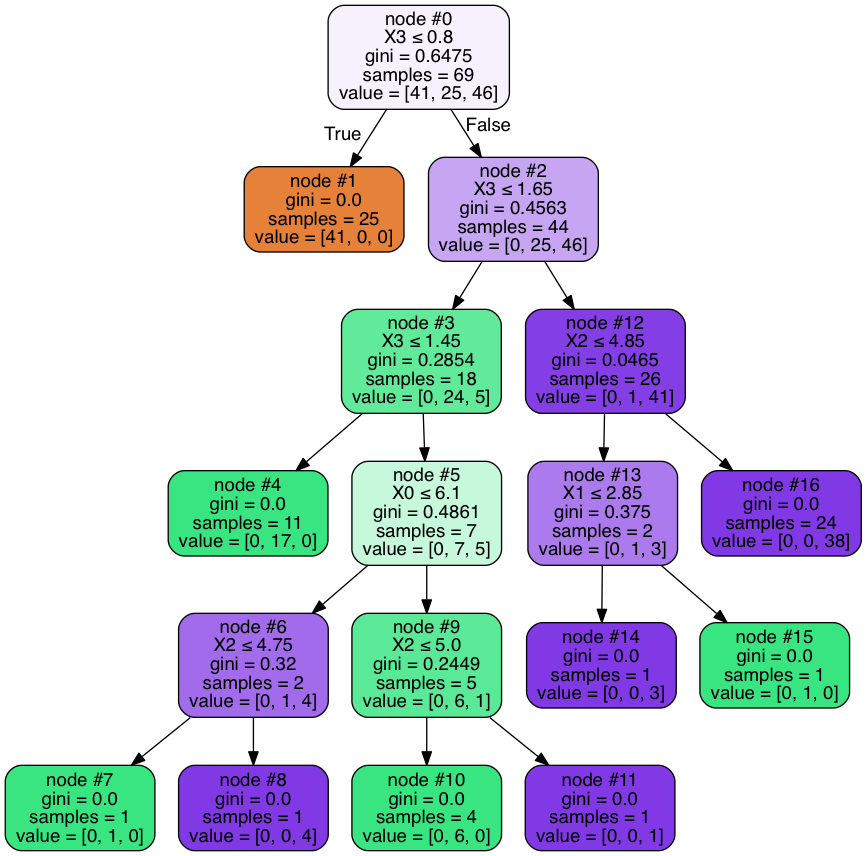

In [82]:
# Now plot the trees individually
utils.draw_tree(inp_tree = estimator0)

## Decision Tree 1 (Second) - Get output

In [83]:
utils.prettyPrintDict(inp_dict = tree_dat1)

{   'all_leaf_node_classes': [0, 1, 1, 2, 1, 2, 2, 1, 2],
    'all_leaf_node_paths': [   array([0, 1]),
                               array([0, 2, 3, 4]),
                               array([0, 2, 3, 5, 6]),
                               array([0, 2, 3, 5, 7, 8, 9]),
                               array([ 0,  2,  3,  5,  7,  8, 10]),
                               array([ 0,  2,  3,  5,  7, 11]),
                               array([ 0,  2, 12, 13, 14]),
                               array([ 0,  2, 12, 13, 15]),
                               array([ 0,  2, 12, 16])],
    'all_leaf_node_values': [   array([[42,  0,  0]]),
                                array([[ 0, 22,  0]]),
                                array([[0, 6, 0]]),
                                array([[0, 0, 2]]),
                                array([[0, 1, 0]]),
                                array([[0, 0, 2]]),
                                array([[0, 0, 2]]),
                                array([[0, 1, 0]]

### Check the output against the decision tree graph

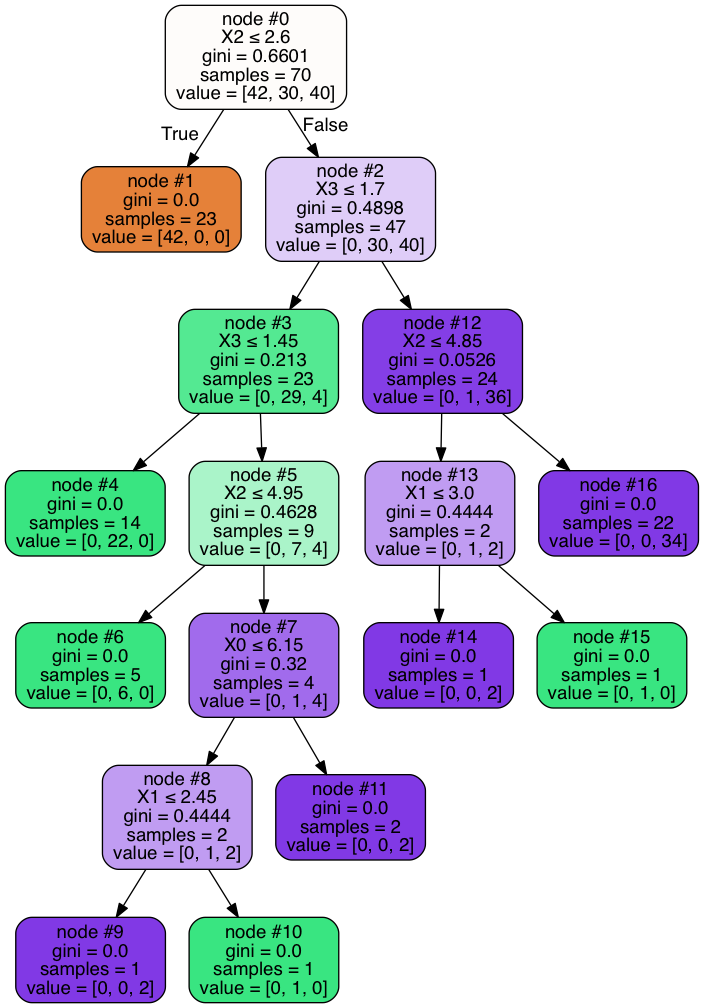

In [84]:
# Now plot the trees individually
utils.draw_tree(inp_tree = estimator1)

## Step 3: Get the Gini Importance of Weights for the Random Forest 

* For the first random forest we just need to get the Gini Importance of Weights

### Step 3.1 Get them numerically - most important

In [93]:
feature_importances = rf.feature_importances_
std = np.std([dtree.feature_importances_ for dtree in rf.estimators_]
             , axis=0)
feature_importances_rank_idx = np.argsort(feature_importances)[::-1]

# Check that the feature importances are standardized to 1
print(sum(importances))

1.0


### Step 3.2 Display Feature Importances Graphically (just for interest)

Feature ranking:
1. feature 3 (0.630610)
2. feature 2 (0.321840)
3. feature 1 (0.028378)
4. feature 0 (0.019172)


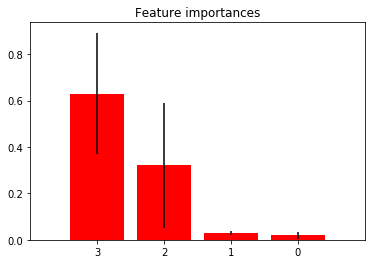

In [94]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[feature_importances_rank_idx],
       color="r", yerr=std[feature_importances_rank_idx], align="center")
plt.xticks(range(X_train.shape[1]), feature_importances_rank_idx)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Putting it all together

* Create a dictionary object to include all of the random forest objects 

In [102]:
# CHECK: If the random forest objects are going to be really large in size
#        we could just omit them and only return our custom summary outputs
all_rf_outputs = {"rf_obj" : rf,
                 "feature_importances" : feature_importances,
                 "feature_importances_rank_idx" : feature_importances_rank_idx}

In [103]:
# CHECK: The following should be paralellized!
# CHECK: Whether we can maintain X_train correctly as required
for idx, dtree in enumerate(rf.estimators_):
    dtree_out = utils.getTreeData(X_train = X_train, dtree = dtree, root_node_id = 0)
    # Append output to dictionary
    all_rf_outputs["dtree" + str(idx)] = dtree_out

## Check the final dictionary of outputs

In [106]:
all_rf_outputs

{'dtree0': {'all_leaf_node_classes': [0, 1, 1, 2, 1, 2, 2, 1, 2],
  'all_leaf_node_paths': [array([0, 1]),
   array([0, 2, 3, 4]),
   array([0, 2, 3, 5, 6, 7]),
   array([0, 2, 3, 5, 6, 8]),
   array([ 0,  2,  3,  5,  9, 10]),
   array([ 0,  2,  3,  5,  9, 11]),
   array([ 0,  2, 12, 13, 14]),
   array([ 0,  2, 12, 13, 15]),
   array([ 0,  2, 12, 16])],
  'all_leaf_node_values': [array([[41,  0,  0]]),
   array([[ 0, 17,  0]]),
   array([[0, 1, 0]]),
   array([[0, 0, 4]]),
   array([[0, 6, 0]]),
   array([[0, 0, 1]]),
   array([[0, 0, 3]]),
   array([[0, 1, 0]]),
   array([[ 0,  0, 38]])],
  'all_leaf_nodes': [1, 4, 7, 8, 10, 11, 14, 15, 16],
  'all_leaf_paths_features': [array([3]),
   array([3, 3, 3]),
   array([3, 3, 3, 0, 2]),
   array([3, 3, 3, 0, 2]),
   array([3, 3, 3, 0, 2]),
   array([3, 3, 3, 0, 2]),
   array([3, 3, 2, 1]),
   array([3, 3, 2, 1]),
   array([3, 3, 2])],
  'all_uniq_leaf_paths_features': [array([3]),
   array([3]),
   array([0, 2, 3]),
   array([0, 2, 3]),
   a